#                        Telangana Ground Water Classification

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
import joblib
import math

C:\Users\SADIYA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
d=pd.read_excel("water_data 1.xlsx")

## Data

In [3]:
d.head()

,Unnamed: 0,sno,district,mandal,village,temp_id,long_gis,lat_gis,gwl,season,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,0,1,ADILABAD,Adilabad,Adilabad,1001,78.524700,19.668300,16.45,premonsoon 2018,...,129.0,95.0,5.0,48.0,111.826,579.810855,1.715349,C3S1,-6.796217,P.S.
1,1,2,ADILABAD,Bazarhatnur,Bazarhatnur,1002,78.350833,19.458888,38.60,premonsoon 2018,...,115.0,105.0,19.0,104.0,87.516,619.851974,1.833654,C3S1,-5.197039,P.S.
2,2,3,ADILABAD,Gudihatnoor,Gudihatnoor,1007,78.512222,19.525555,NaN,premonsoon 2018,...,56.0,55.0,2.0,56.0,72.930,439.876645,1.140169,C3S1,-2.597533,P.S.
3,3,4,ADILABAD,Jainath,Jainath,1009,78.640000,19.730555,6.20,premonsoon 2018,...,30.0,63.0,2.0,40.0,19.448,179.967105,2.041814,C2S1,1.000658,P.S.
4,4,5,ADILABAD,Narnoor,Narnoor,1010,78.852654,19.495665,6.15,premonsoon 2018,...,25.0,49.0,7.0,32.0,24.310,179.958882,1.588114,C2S1,0.800822,P.S.


In [4]:
d.shape

(1090, 28)

# Data Preprocessing
## Missing Values

In [8]:
d.isnull().sum()

Unnamed: 0           0
sno                  0
district             0
mandal               0
village              0
temp_id              0
long_gis             0
lat_gis              0
gwl                 27
season               0
pH                   0
E.C                  0
TDS                  1
CO3                  1
HCO3                 1
Cl                   1
F                    1
NO3                  1
SO4                  1
Na                   1
K                    1
Ca                   1
Mg                   1
T.H                  1
SAR                  1
Classification       1
RSC  meq  / L        1
Classification.1     1
dtype: int64

We can see that "gwl" feature have the highest null values.there are many ways to deal with the missing values. as our datset is small we will go by imputing median values in the columns that contain null values

In [9]:
null_rows = d[d.isnull().any(axis=1)]

In [13]:
null_rows.head(28)

,Unnamed: 0,sno,district,mandal,village,temp_id,long_gis,lat_gis,gwl,season,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
2,2,3,ADILABAD,Gudihatnoor,Gudihatnoor,1007,78.512222,19.525555,NaN,premonsoon 2018,...,56.00,55.000000,2.00,56.0,72.930,439.876645,1.140169,C3S1,-2.597533,P.S.
14,14,16,BHADRADRI,Gundala,Kanchanapalli,3016,80.420000,17.790000,NaN,premonsoon 2018,...,12.00,20.452211,68.50,48.0,48.620,319.917763,0.497157,C3S1,-2.833339,P.S.
15,15,17,BHADRADRI,Julurpadu,P. Narsapuram,3019,80.520318,17.438169,NaN,premonsoon 2018,...,34.00,466.757502,24.20,24.0,228.514,999.613487,6.418705,C4S2,-11.887933,P.S.
18,18,20,BHADRADRI,Manuguru,Pagideru,3022,80.730000,17.970000,NaN,premonsoon 2018,...,12.00,111.268446,37.40,40.0,43.758,279.925987,2.891496,C3S1,0.770840,P.S.
19,19,21,BHADRADRI,Palwancha,REGELLA,3029,80.580000,17.950000,NaN,premonsoon 2018,...,8.00,23.566401,0.70,8.0,9.724,59.983553,1.322968,C1S1,0.146018,P.S.
20,20,22,BHADRADRI,Tekulapalli,Bethampudi,3034,80.450000,17.560000,NaN,premonsoon 2018,...,45.00,81.999396,1.60,136.0,121.550,839.794408,1.230258,C3S1,-8.667324,P.S.
21,21,23,BHADRADRI,Tekulapalli,Mutyalampadu,3035,80.500000,17.540000,NaN,premonsoon 2018,...,35.00,507.602245,7.80,40.0,34.034,239.942434,14.247615,C4S3,12.700081,U.S.
22,22,24,BHADRADRI,Yellandu,Komararam,3036,80.320000,17.710000,NaN,premonsoon 2018,...,8.00,8.611526,12.70,64.0,24.310,259.958882,0.232220,C2S1,-0.208974,P.S.
23,23,25,BHUPALPALLY,Ghanpur Mulug,Chelpur(D),3041,79.853503,18.368545,NaN,premonsoon 2018,...,16.00,16.000000,2.00,32.0,4.862,99.991776,0.695681,C2S1,-0.399836,P.S.
165,166,169,MEDCHAL,Qutubullapur,Shapurnagar,1394,78.440000,17.540000,NaN,premonsoon 2018,...,12.00,122.335347,2.40,64.0,53.482,379.909539,2.728877,C3S1,-0.774261,P.S.


In row number 269, all the chemical values are NaN, providing no meaningful information, so we opt to remove it.

In [15]:
d=d.drop(269)

In [16]:
d.isnull().sum()

Unnamed: 0           0
sno                  0
district             0
mandal               0
village              0
temp_id              0
long_gis             0
lat_gis              0
gwl                 27
season               0
pH                   0
E.C                  0
TDS                  0
CO3                  0
HCO3                 0
Cl                   0
F                    0
NO3                  0
SO4                  0
Na                   0
K                    0
Ca                   0
Mg                   0
T.H                  0
SAR                  0
Classification       0
RSC  meq  / L        0
Classification.1     0
dtype: int64

Now only "gwl" has null values.We impute the "gwl" feature based on district-specific medians

## Districts that have "gwl" as Nan

In [17]:
null_rows.district.value_counts()

BHADRADRI        7
MEDCHAL          3
RANGAREDDY       3
SIDDIPET         3
NALGONDA         3
ADILABAD         2
BHUPALPALLY      1
MULUGU           1
NIZAMABAD        1
YADADRI          1
HYDERABAD        1
MEDAK            1
KUMURAM BHEEM    1
Name: district, dtype: int64

## Function to fill NaN values in "gwl" based on district-specific medians

In [20]:
def fill_nan_with_median(df, district, column):
    median_value = df.loc[df["district"] == district, column].median()
    df.loc[(df["gwl"].isna()) & (df["district"] == district), column] = median_value

# List of districts with NaN values
districts = ["BHADRADRI", "MEDCHAL","RANGAREDDY", "SIDDIPET", "NALGONDA", "ADILABAD", "BHUPALPALLY", "MULUGU","NIZAMABAD", 
            "YADADRI","HYDERABAD","MEDAK","KUMURAM BHEEM"]

for district in districts:
    fill_nan_with_median(d, district, "gwl")
d.head()

,Unnamed: 0,sno,district,mandal,village,temp_id,long_gis,lat_gis,gwl,season,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,0,1,ADILABAD,Adilabad,Adilabad,1001,78.524700,19.668300,16.45,premonsoon 2018,...,129.0,95.0,5.0,48.0,111.826,579.810855,1.715349,C3S1,-6.796217,P.S.
1,1,2,ADILABAD,Bazarhatnur,Bazarhatnur,1002,78.350833,19.458888,38.60,premonsoon 2018,...,115.0,105.0,19.0,104.0,87.516,619.851974,1.833654,C3S1,-5.197039,P.S.
2,2,3,ADILABAD,Gudihatnoor,Gudihatnoor,1007,78.512222,19.525555,7.27,premonsoon 2018,...,56.0,55.0,2.0,56.0,72.930,439.876645,1.140169,C3S1,-2.597533,P.S.
3,3,4,ADILABAD,Jainath,Jainath,1009,78.640000,19.730555,6.20,premonsoon 2018,...,30.0,63.0,2.0,40.0,19.448,179.967105,2.041814,C2S1,1.000658,P.S.
4,4,5,ADILABAD,Narnoor,Narnoor,1010,78.852654,19.495665,6.15,premonsoon 2018,...,25.0,49.0,7.0,32.0,24.310,179.958882,1.588114,C2S1,0.800822,P.S.


In [21]:
d.isnull().sum()

Unnamed: 0          0
sno                 0
district            0
mandal              0
village             0
temp_id             0
long_gis            0
lat_gis             0
gwl                 0
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

## Deleting unnecessary Features

In [22]:
columns = ["sno","district","mandal","village","temp_id","long_gis","lat_gis","Classification.1","season"]
d=d.drop(columns=columns)

In [23]:
d.head()

,Unnamed: 0,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L
0,0,16.45,8.21,1407.0,900.48,0.0,240.0,190.0,0.34,94.33770,129.0,95.0,5.0,48.0,111.826,579.810855,1.715349,C3S1,-6.796217
1,1,38.60,8.29,1620.0,1036.80,0.0,360.0,150.0,0.34,173.17390,115.0,105.0,19.0,104.0,87.516,619.851974,1.833654,C3S1,-5.197039
2,2,7.27,8.34,959.0,613.76,50.0,260.0,70.0,0.62,41.23399,56.0,55.0,2.0,56.0,72.930,439.876645,1.140169,C3S1,-2.597533
3,3,6.20,8.22,509.0,325.76,0.0,230.0,30.0,0.91,19.26615,30.0,63.0,2.0,40.0,19.448,179.967105,2.041814,C2S1,1.000658
4,4,6.15,8.29,550.0,352.00,0.0,220.0,20.0,1.23,32.42028,25.0,49.0,7.0,32.0,24.310,179.958882,1.588114,C2S1,0.800822


In [24]:
d= d.iloc[:, :-1]

In [25]:
d= d.iloc[:, 1:]

In [26]:
d.head()

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification
0,16.45,8.21,1407.0,900.48,0.0,240.0,190.0,0.34,94.33770,129.0,95.0,5.0,48.0,111.826,579.810855,1.715349,C3S1
1,38.60,8.29,1620.0,1036.80,0.0,360.0,150.0,0.34,173.17390,115.0,105.0,19.0,104.0,87.516,619.851974,1.833654,C3S1
2,7.27,8.34,959.0,613.76,50.0,260.0,70.0,0.62,41.23399,56.0,55.0,2.0,56.0,72.930,439.876645,1.140169,C3S1
3,6.20,8.22,509.0,325.76,0.0,230.0,30.0,0.91,19.26615,30.0,63.0,2.0,40.0,19.448,179.967105,2.041814,C2S1
4,6.15,8.29,550.0,352.00,0.0,220.0,20.0,1.23,32.42028,25.0,49.0,7.0,32.0,24.310,179.958882,1.588114,C2S1


## Duplicate Values

In [27]:
d.duplicated().sum()

0

In [89]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1089
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gwl             1089 non-null   float64
 1   pH              1089 non-null   float64
 2   E.C             1089 non-null   float64
 3   TDS             1089 non-null   float64
 4   CO3             1089 non-null   float64
 5   HCO3            1089 non-null   float64
 6   Cl              1089 non-null   float64
 7   F               1089 non-null   float64
 8   NO3             1089 non-null   float64
 9   SO4             1089 non-null   float64
 10  Na              1089 non-null   float64
 11  K               1089 non-null   float64
 12  Ca              1089 non-null   float64
 13  Mg              1089 non-null   float64
 14  T.H             1089 non-null   float64
 15  SAR             1089 non-null   float64
 16  Classification  1089 non-null   object 
dtypes: float64(16), object(1)
memory 

## Distributions

array([[<AxesSubplot:title={'center':'gwl'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'E.C'}>,
        <AxesSubplot:title={'center':'TDS'}>],
       [<AxesSubplot:title={'center':'CO3'}>,
        <AxesSubplot:title={'center':'HCO3'}>,
        <AxesSubplot:title={'center':'Cl'}>,
        <AxesSubplot:title={'center':'F'}>],
       [<AxesSubplot:title={'center':'NO3'}>,
        <AxesSubplot:title={'center':'SO4'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Mg'}>,
        <AxesSubplot:title={'center':'T.H'}>,
        <AxesSubplot:title={'center':'SAR'}>]], dtype=object)

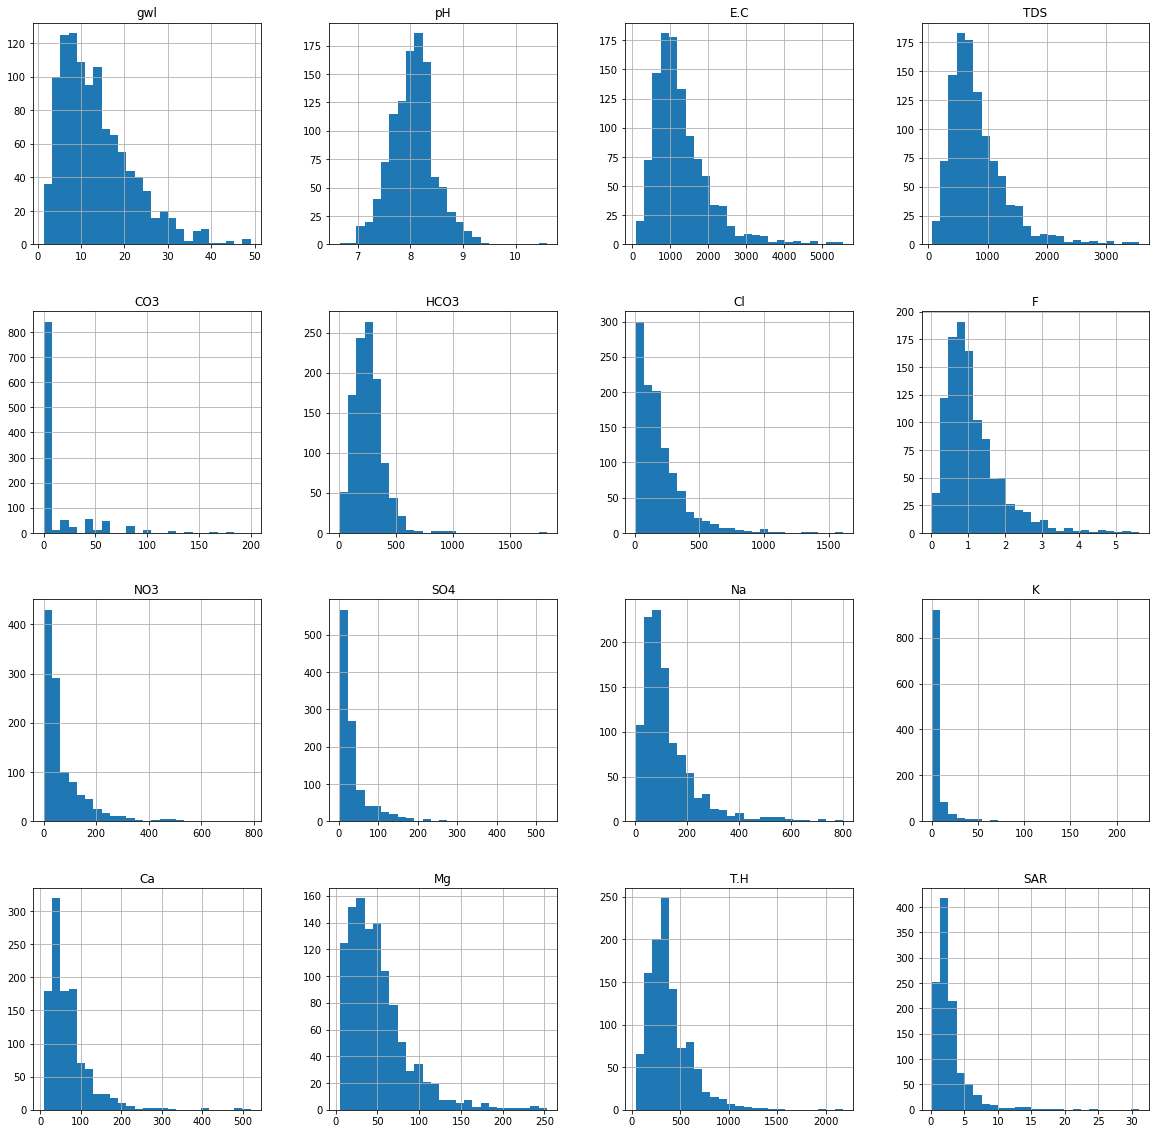

In [28]:
d.hist(bins=25,figsize=(20,20))

Almost all the Features are right skewed.

## Outliers

<AxesSubplot:>

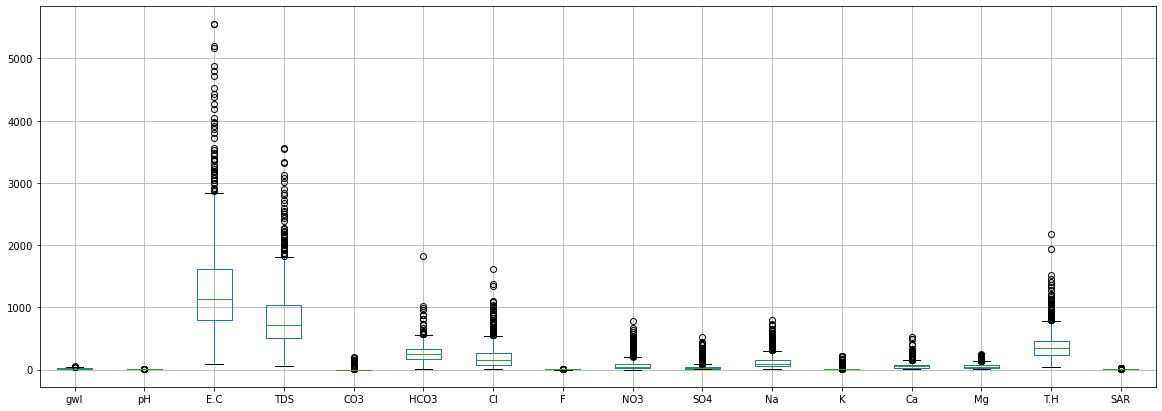

In [32]:
d.boxplot(figsize=(20,7))

In [33]:
Q1 =d.quantile(0.25)
Q3 = d.quantile(0.75) 
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 1.5

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers for each feature
outliers = ((d< lower_bound) | (d> upper_bound))

# Count the number of outliers for each feature
outlier_counts = outliers.sum()

# Display the number of outliers for each feature
print("Number of Outliers:")
print(outlier_counts)

Number of Outliers:
CO3               248
Ca                 60
Cl                 55
Classification      0
E.C                47
F                  56
HCO3               21
K                 124
Mg                 36
NO3                77
Na                 64
SAR                83
SO4               133
T.H                58
TDS                47
gwl                26
pH                 23
dtype: int64


C:\Users\SADIYA\AppData\Local\Temp/ipykernel_13560/535593086.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((d< lower_bound) | (d> upper_bound))


## Dealing with Skewness

Skewed data can cause some machine learning algorithms to perform poorly or erratically. Even models that don't explicitly assume normality can be sensitive to extreme values or imbalances in the data. Mitigating skewness can make our models more robust and less likely to produce unpredictable results.Additionally, reduces the influence of outliers, leading to more stable model behavior.

We can deal with skewness by applying various techniques and transformations to make the data distribution more symmetrical or balanced.we have log transformation, square root-cube root transformation, Boc-Cox transformation and many more. for our data we will use square root, cube root and log transformation.

## Transformations

In [34]:
#before tranforming lets copy out data
d1=d.copy()

In [35]:
def cbrt_transform(df, column_name):
    df[column_name] = np.cbrt(df[column_name])

In [36]:
columns=["E.C","TDS","HCO3","F","Na","Mg","CO3","NO3"]
for column_name in columns:
    cbrt_transform(d1, column_name)

In [37]:
def log10_transform(df, column_name):
    df[column_name] = np.log10(df[column_name])

In [38]:
columns=["Cl","SO4","K","Ca","T.H"]
for column_name in columns:
    log10_transform(d1, column_name)

In [39]:
d1["gwl"]=np.sqrt(d1["gwl"])

In [40]:
d1["SAR"]=np.log10(d1["SAR"])

array([[<AxesSubplot:title={'center':'gwl'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'E.C'}>,
        <AxesSubplot:title={'center':'TDS'}>],
       [<AxesSubplot:title={'center':'CO3'}>,
        <AxesSubplot:title={'center':'HCO3'}>,
        <AxesSubplot:title={'center':'Cl'}>,
        <AxesSubplot:title={'center':'F'}>],
       [<AxesSubplot:title={'center':'NO3'}>,
        <AxesSubplot:title={'center':'SO4'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Mg'}>,
        <AxesSubplot:title={'center':'T.H'}>,
        <AxesSubplot:title={'center':'SAR'}>]], dtype=object)

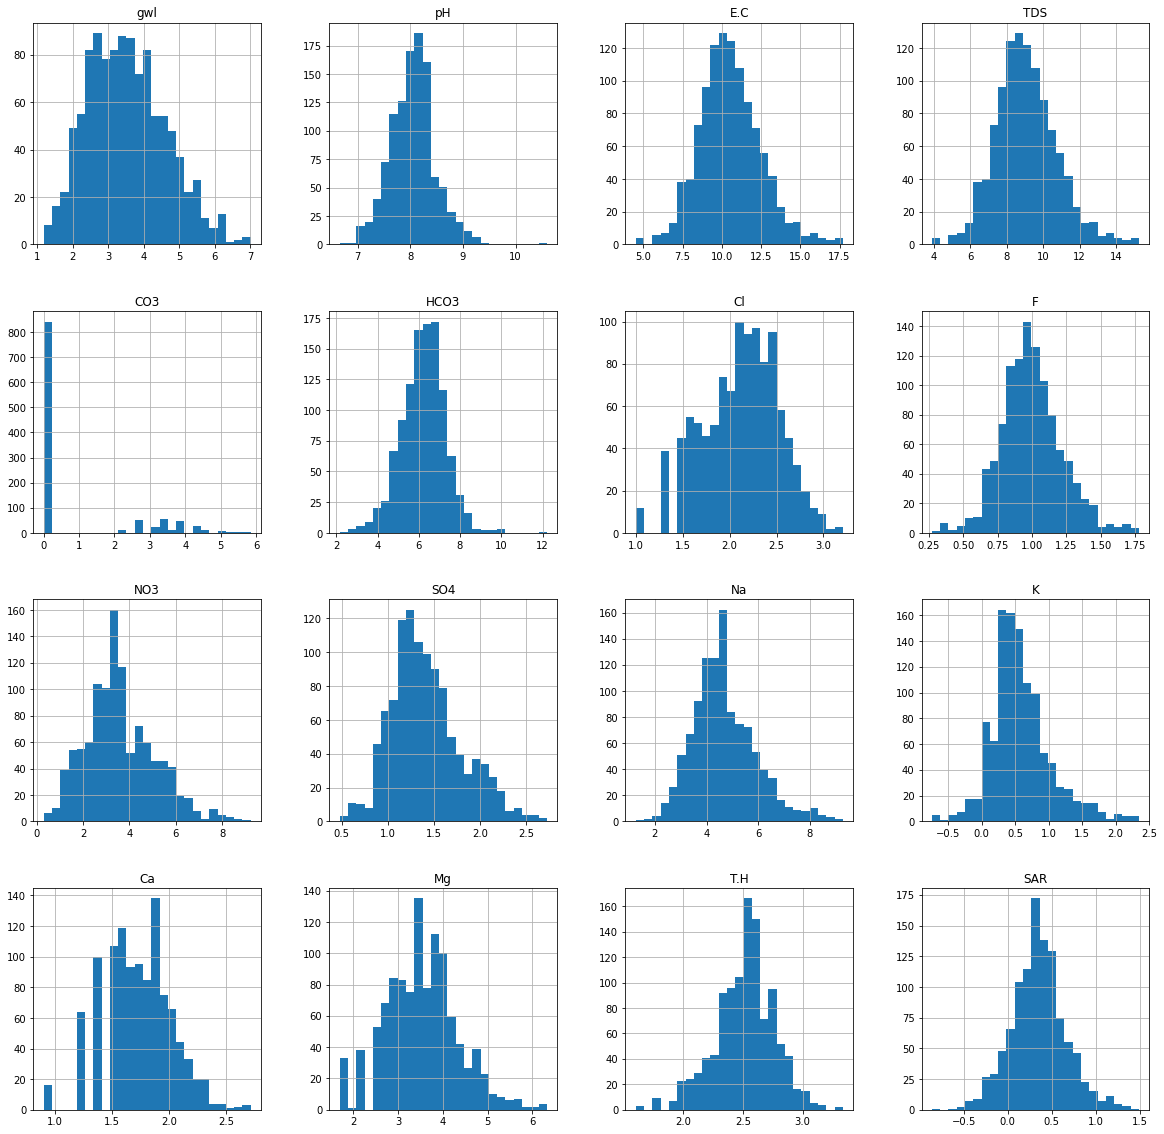

In [41]:
d1.hist(bins=25,figsize=(20,20))

Now, our data has almost symmetric distribution. let's look at the impact of transformation on outliers.

<AxesSubplot:>

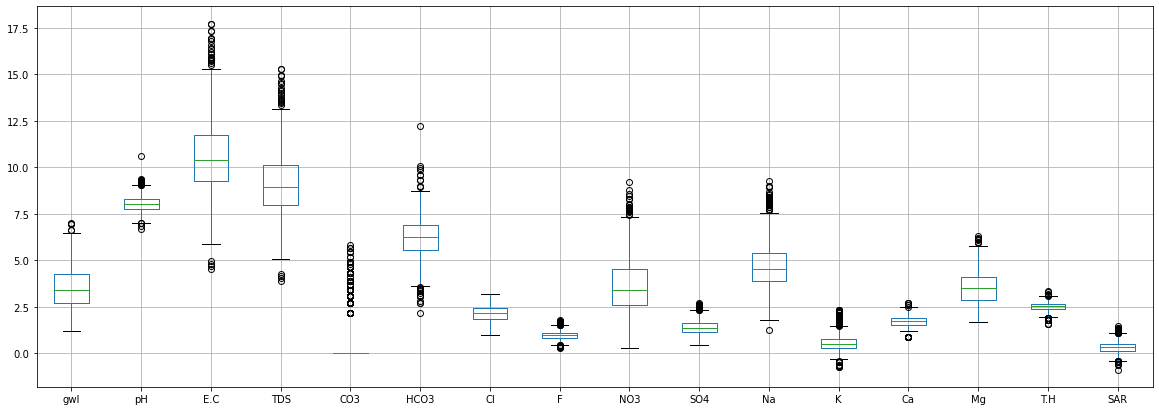

In [42]:
d1.boxplot(figsize=(20,7))

In [43]:
Q1 =d1.quantile(0.25)
Q3 = d1.quantile(0.75) 
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 1.5

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers for each feature
outliers = ((d1< lower_bound) | (d1> upper_bound))

# Count the number of outliers for each feature
outlier_counts = outliers.sum()

# Display the number of outliers for each feature
print("Number of Outliers:")
print(outlier_counts)

Number of Outliers:
CO3               248
Ca                 22
Cl                  0
Classification      0
E.C                23
F                  29
HCO3               25
K                  60
Mg                  7
NO3                20
Na                 29
SAR                33
SO4                20
T.H                27
TDS                23
gwl                 5
pH                 23
dtype: int64


C:\Users\SADIYA\AppData\Local\Temp/ipykernel_13560/2444841208.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((d1< lower_bound) | (d1> upper_bound))


The number have significatly decreased from the number of outliers before tranformation.The higher number of outliers observed in the CO3 values can be due to the predominance of zero values within this variable. This occurrence is largely due to the relationship between carbonates (CO3) and groundwater pH levels. Specifically, carbonates are typically present in groundwater when the pH exceeds a threshold of 8.3. In our dataset,the majority of recorded groundwater pH values fall below this critical pH level, resulting in a concentration of zero values for CO3. Consequently, any non-zero CO3 values in this context are considered outliers, as they significantly deviate from the prevailing pattern of zero values.

In [45]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
gwl,1089.0,3.522152,1.083810,1.183216,2.705550,3.416138,4.254409,7.007853
pH,1089.0,8.048567,0.423736,6.660000,7.770000,8.050000,8.280000,10.590000
E.C,1089.0,10.531552,1.957258,4.514357,9.252130,10.403500,11.722813,17.715698
TDS,1089.0,9.073920,1.686804,3.890355,7.973244,8.949512,10.098232,15.266926
CO3,1089.0,0.810313,1.534280,0.000000,0.000000,0.000000,0.000000,5.848035
HCO3,1089.0,6.208841,1.068023,2.163855,5.581813,6.233323,6.910423,12.208717
Cl,1089.0,2.121123,0.403105,1.000000,1.845098,2.176091,2.414973,3.206826
F,1089.0,0.994078,0.220909,0.271442,0.852702,0.979586,1.121346,1.778973
NO3,1089.0,3.601132,1.484484,0.298414,2.606885,3.429847,4.541563,9.233615
SO4,1089.0,1.413366,0.383843,0.477121,1.146128,1.361728,1.623249,2.721811


## Permisibility and Non permisibility of various chemicals 

In [48]:
def counting(column,ll,ul):
    c=0
    c1=0
    for i in column:
        if i>ll and i<ul:
             c=c+1
        else:
            c1=c1+1
    return c,c1

def plotting(l,tit):
    N=["permissible","not permissible"]
    plt.pie(l,labels=N,autopct="%0.1f%%")
    plt.title(tit)
    plt.show()

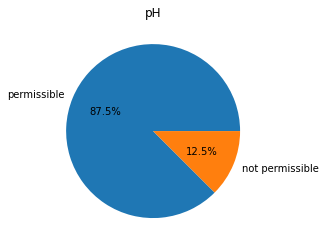

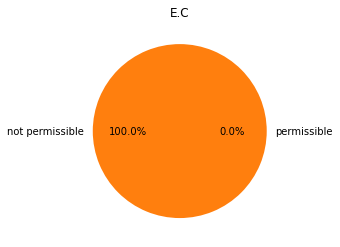

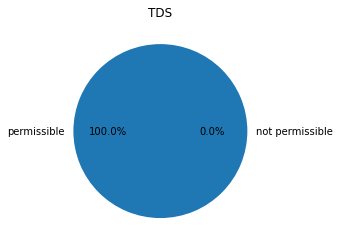

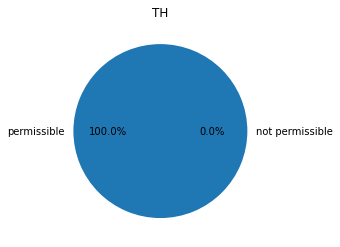

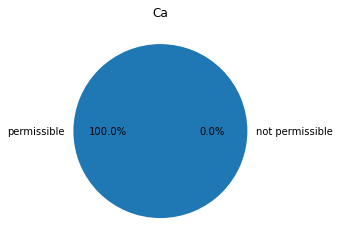

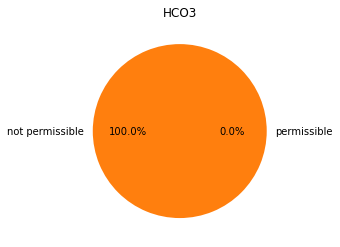

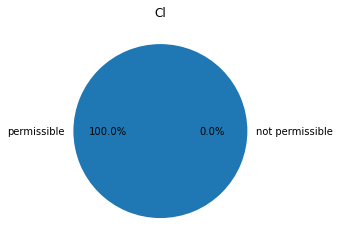

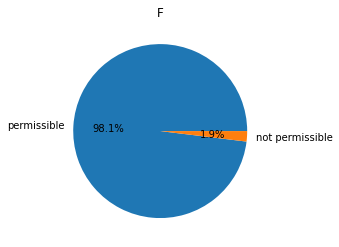

In [49]:
l=counting(d1["pH"],6,8.5)
plotting(l,"pH")
l1=counting(d1["E.C"],500,3000)
plotting(l1,"E.C")
l2=counting(d1["TDS"],0,2000)
plotting(l2,"TDS")
l3=counting(d1["T.H"],0,600)
plotting(l3,"TH")
l4=counting(d1["Ca"],0,200)
plotting(l4,"Ca")
l5=counting(d1["HCO3"],100,800)
plotting(l5,"HCO3")
l6=counting(d1["Cl"],0,1000)
plotting(l6,"Cl")
l7=counting(d1["F"],0,1.5)
plotting(l7,"F")

The above Pie Charts represent the percentages of the variable values which fall
under the permissible and non-permissible limits given by BIS (Bureau of Indian
Standards).

## Correlation Heat map

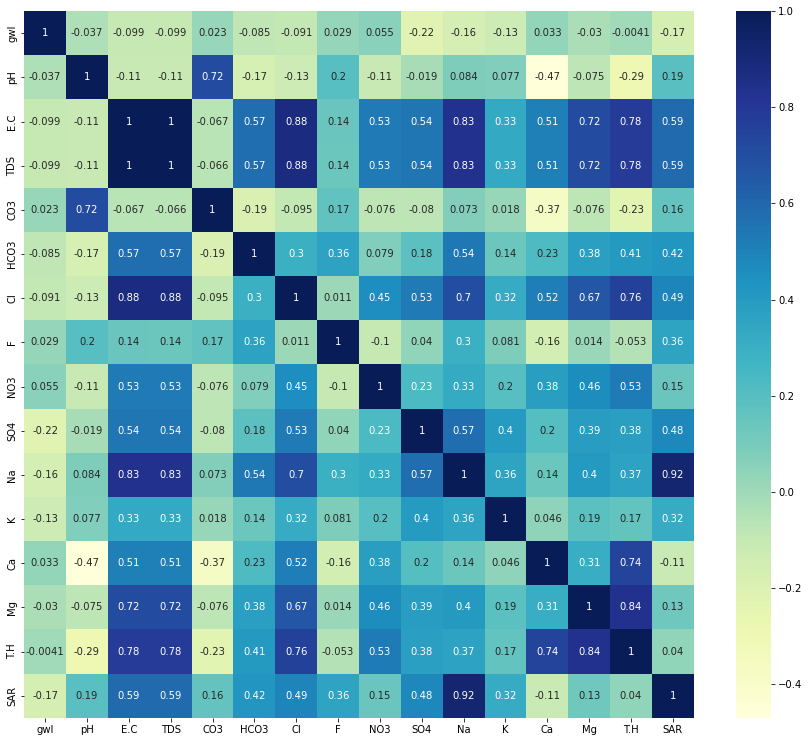

In [51]:
fig, ax = plt.subplots(figsize=(15,13))
dataplot = sns.heatmap(d1.corr(), cmap="YlGnBu", annot=True,ax=ax)

We observe a substantial degree of collinearity and multicollinearity among our variables, primarily because many of these variables are derived from or built upon others. While moderate multicollinearity might not pose significant issues, severe multicollinearity can be problematic because it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. The result is that the coefficientestimates are unstable and difficult to interpret.

## Principal Component Analysis (PCA)
To tackle the issue of multicollinearity and simultaneously reduce the dimensionality of our dataset, we are employing Principal Component Analysis (PCA). This technique allows us to transform correlated variables into orthogonal principal components, simplifying our modeling process while retaining the crucial information present in the original features.

In [53]:
d1["Classification"].value_counts()

C3S1               706
C2S1               229
C4S1                51
C4S2                36
C3S2                32
C1S1                 9
C4S4                 9
C4S3                 8
C3S3                 4
O.G                  2
OG                   1
C3S4                 1
BELOW THE GRAPH      1
Name: Classification, dtype: int64

In [54]:
delete = ["C3S3","O.G","OG","C3S4","BELOW THE GRAPH"]

# Create a new DataFrame by filtering out rows with the specified value
d1=d1[~d1["Classification"].isin(delete)]

In [55]:
d1=d1.reset_index(drop=True)

In [56]:
from sklearn.decomposition import PCA
X=d1.drop('Classification',axis=1)
Y=d1['Classification']
pcal=PCA(n_components=7)
pca_fit=pcal.fit_transform(X)

In [60]:
pca_fit.shape

(1080, 7)

In [62]:
pcal.explained_variance_ratio_

array([0.56091022, 0.15418944, 0.11214695, 0.06883994, 0.03442289,
       0.03222655, 0.01307443])

In [63]:
sum(pcal.explained_variance_ratio_)

0.9758104183368635

It means that the selected principal components collectively capture about 97.58% of the total variance in the original dataset

## Label Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [65]:
X=pca_fit

## Training and Testing ML Models

* Decision Tree
* K-Nearest Neighbors
* Support Vector Classifier
* XGBoost Classifier
* Random Forest Classifier

In [67]:
# Split the data into training and testing sets

X_train,X_test,Y_train,Y_test=train_test_split(pca_fit,Y,test_size=0.25,random_state=42)


# Create a list of classifiers
classifiers = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Classifier", SVC(random_state=42)),
    ("XGBoost Classifier", xgb.XGBClassifier(random_state=42)),
    ("Random Forest Classifier", RandomForestClassifier(random_state=42))
]

# Initialize a dictionary to store accuracies
accuracies = {}

# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, Y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    accuracies[name] = accuracy

# Print all accuracies
for name, accuracy in accuracies.items():
    print(f"{name} Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.89
K-Nearest Neighbors Accuracy: 0.87
Support Vector Classifier Accuracy: 0.90
XGBoost Classifier Accuracy: 0.92
Random Forest Classifier Accuracy: 0.91


## Training and Testing Xgboost and Randon Forest Models using Stratified k-Fold Cross-Validation

In [68]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


# Specify the number of folds (k)
k = 5  # You can change this number to your desired value

# Initialize StratifiedKFold with 'k' splits
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a variable to keep track of fold number
fold_number = 1

# Loop through the folds
for train_index, test_index in stratified_kfold.split(X, Y):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Instantiate and train your Random Forest classifier on the training data
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
    rf_model.fit(X_train, Y_train)

    # Instantiate and train your XGBoost classifier on the training data
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)  # You can adjust hyperparameters
    xgb_model.fit(X_train, Y_train)

    # Make predictions with both models on the testing data
    rf_pred = rf_model.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)

    # Evaluate both models using accuracy (you can use other metrics as well)
    rf_accuracy = accuracy_score(Y_test, rf_pred)
    xgb_accuracy = accuracy_score(Y_test, xgb_pred)
    
    print(f"Random Forest - Fold {fold_number}: Accuracy = {rf_accuracy:.2f}")
    print(f"XGBoost - Fold {fold_number}: Accuracy = {xgb_accuracy:.2f}")
    
    # Increment fold number for the next iteration
    fold_number += 1


Random Forest - Fold 1: Accuracy = 0.93
XGBoost - Fold 1: Accuracy = 0.94
Random Forest - Fold 2: Accuracy = 0.88
XGBoost - Fold 2: Accuracy = 0.89
Random Forest - Fold 3: Accuracy = 0.89
XGBoost - Fold 3: Accuracy = 0.90
Random Forest - Fold 4: Accuracy = 0.92
XGBoost - Fold 4: Accuracy = 0.92
Random Forest - Fold 5: Accuracy = 0.93
XGBoost - Fold 5: Accuracy = 0.95


## Model Evaluation

In [69]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_test, xgb_pred)
precision_micro = precision_score(Y_test, xgb_pred, average='micro')
recall_micro = recall_score(Y_test, xgb_pred, average='micro')
f1_micro = f1_score(Y_test, xgb_pred, average='micro')

# Create a DataFrame to display the metrics in a table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Micro)', 'Recall (Micro)', 'F1-Score (Micro)'],
    'Value': [accuracy, precision_micro, recall_micro, f1_micro]
})

print(metrics_df)

# If you want per-class precision, recall, and F1-score, you can use classification_report
class_report = classification_report(Y_test, xgb_pred)

print("Classification Report:\n", class_report)

              Metric     Value
0           Accuracy  0.953704
1  Precision (Micro)  0.953704
2     Recall (Micro)  0.953704
3   F1-Score (Micro)  0.953704
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        46
           2       1.00      0.98      0.99       141
           3       0.67      1.00      0.80         6
           4       0.80      0.80      0.80        10
           5       0.71      0.71      0.71         7
           6       0.33      0.50      0.40         2
           7       1.00      0.50      0.67         2

    accuracy                           0.95       216
   macro avg       0.81      0.75      0.75       216
weighted avg       0.96      0.95      0.95       216



we see precision for Class 6 is very low, this may be because Class6 is very few in number in our dataset due to which even a small number of false positives can have a significant impact on precision.


Increasing the dataset size can potentially help improve the model's performance for class 6 and other underrepresented classes. With more data, the model has the opportunity to learn better representations and patterns for these minority classes, leading to improved precision and overall model performance.

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

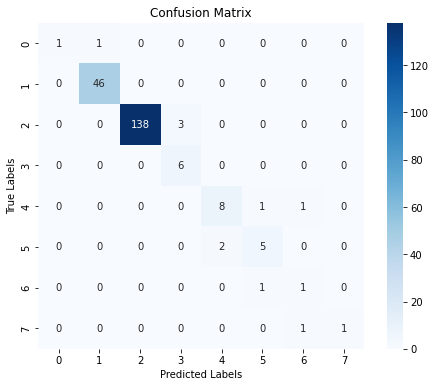

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Compute confusion matrix
cm = confusion_matrix(Y_test, xgb_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


## Model Dump and Classifying new Values

In [70]:
encoded_classes = encoder.classes_

for i, class_label in enumerate(encoded_classes):
    print(f"Class Label: {class_label} - Encoded Value: {i}")

Class Label: C1S1 - Encoded Value: 0
Class Label: C2S1 - Encoded Value: 1
Class Label: C3S1 - Encoded Value: 2
Class Label: C3S2 - Encoded Value: 3
Class Label: C4S1 - Encoded Value: 4
Class Label: C4S2 - Encoded Value: 5
Class Label: C4S3 - Encoded Value: 6
Class Label: C4S4 - Encoded Value: 7


In [71]:
import pickle

with open('Water_Quality_Classification.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [88]:
import joblib
import math
import pandas as pd
from sklearn.decomposition import PCA  # Import PCA if not already imported

# Loading the pre-trained Random Forest model
xgb_model = joblib.load("Water_Quality_Classification.pkl")


# User Inputs: Provide new data as a dictionary
new_data1 = {
    'gwl': float(input("Enter Ground Water level: ")),
    'pH': float(input("Enter pH: ")),
    'E.C': float(input("Enter Electrical conductivity: ")),
}
new_data1['TDS']= 0.64 * new_data1['E.C'],

new_data2={
    'CO3': float(input("Enter CO3 Value: ")),
    'HCO3': float(input("Enter HCO3 Value: ")),
    'Cl': float(input("Enter Cl Value: ")),
    'F': float(input("Enter F Value: ")),
    'NO3': float(input("Enter NO3 Value: ")),
    'SO4': float(input("Enter SO4 Value: ")),
    'Na': float(input("Enter Na Value: ")),
    'K': float(input("Enter K Value: ")),
    'Ca': float(input("Enter Ca Value: ")),
    'Mg': float(input("Enter Mg Value: "))
}

new_data = {**new_data1, **new_data2}


# Calculating derived parameters

new_data["T.H"] = (2.497 * new_data['Ca']) + (4.118 * new_data['Mg'])
new_data["SAR"] = (new_data['Na'] * 0.043498) / math.sqrt(((new_data['Ca'] * 0.049903) + (new_data['Mg'] * 0.082288)) / 2)

# Applying the same transformations as done during training (e.g., square root and log10)

columns=["HCO3","F","Na","Mg","CO3","NO3"]
def cbrt_transform(df, column_name):
    df[column_name] = np.cbrt(df[column_name])
for column_name in columns:
    cbrt_transform(new_data, column_name)
def log10_transform(df, column_name):
    df[column_name] = np.log10(df[column_name])
columns=["Cl","SO4","K","Ca"]
for column_name in columns:
    log10_transform(new_data, column_name)   
new_data['gwl'] =np.sqrt(new_data['gwl'])
new_data["TDS"]=np.cbrt(new_data["TDS"])
new_data["T.H"]=np.log10(new_data["T.H"])
new_data["SAR"]=np.log10(new_data["SAR"])
new_data["E.C"]=np.cbrt(new_data["E.C"])

# Creating a DataFrame from the input data
input_df = pd.DataFrame([new_data])

# Applying PCA transformation to the input data
reduced_data = pcal.transform(input_df)

# predictions using our xgb model
predictions = xgb_model.predict(reduced_data)

# Interpreting the predictions and providing irrigation recommendations

class_labels = {
    0: "C1S1",
    1: "C2S1",
    2: "C3S1",
    3: "C3S2",
    4: "C4S1",
    5: "C4S2",
    6: "C4S3",
    7: "C4S4",
}

if predictions[0] in class_labels:
    irrigation_class = class_labels[predictions[0]]
    print(f"For irrigation: {irrigation_class}")

    # descriptions for each prediction class
    descriptions = {
        "C1S1": "Low salinity and low sodium waters are good for irrigation and can be used with most of the crops with no restriction on use on most of the soils.",
        "C2S1": "Medium salinity and low sodium waters are good for irrigation and can be used on almost all soils with a little danger of the development of harmful levels of exchangeable sodium if moderate leaching occurs. Crops can be grown without any special consideration for salinity control.",
        "C3S1": "High salinity and low sodium waters require good drainage. Crops with good salt tolerance should be selected.",
        "C3S2": "The high salinity and medium sodium waters require good drainage and can be used on coarse - textured or organic soils having good permeability.",
        "C4S1": "Very high salinity and low sodium waters are not suitable for irrigation unless thesoil must be permeable and drainage must be adequate.",
        "C4S2": "Very high salinity and medium sodium waters are not suitable for irrigation on fine textured soils and low leaching conditions and can be used for irrigation on coarse texturedor organic soils having good permeability.",
        "C4S3": "Very high salinity and high sodium waters produce harmful levels of exchangeablesodium in most soils and will require special soil management, good drainage, highleaching, and organic matter additions.",
        "C4S4": "Very high salinity and very high sodium waters are generally unsuitable for irrigation purposes. These are sodium chloride types of water and can cause sodiumhazards. It can be used on coarse-textured soils with very good drainage for very high salt-tolerant crops. Gypsum amendments make feasible the use of these waters.",
    
    }

    if irrigation_class in descriptions:
        print("Description:")
        print(descriptions[irrigation_class])
    else:
        print("Description not available for this class.")
else:
    print("Invalid classification. Please check your input or model.")


Enter Ground Water level: 16.45
Enter pH: 8.2
Enter Electrical conductivity: 1620
Enter CO3 Value: 0
Enter HCO3 Value: 360
Enter Cl Value: 150
Enter F Value: 0.34
Enter NO3 Value: 173.17
Enter SO4 Value: 115
Enter Na Value: 105
Enter K Value: 19
Enter Ca Value: 104
Enter Mg Value: 87.5
For irrigation: C3S1
Description:
High salinity and low sodium waters require good drainage. Crops with good salt tolerance should be selected.
